# ✅ Section 1: Python + Machine Learning (1.5 hours)

Dataset: Student Performance Dataset (Math & Portuguese)


Tasks:

1. Load the dataset and perform data cleaning.

2. Perform EDA using visualizations (use seaborn, matplotlib).

3. Predict whether a student will pass or fail based on scores and other features.

4. Use Logistic Regression or Random Forest for classification.

5. Evaluate the model using accuracy, confusion matrix, F1-score.

6. Add comments/markdown to explain the steps.


# Task 1 : Load the dataset and perform data cleaning.

In [19]:
# Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  # Use matplotlib.pyplot, not matplotlib directly
import seaborn as sns   



In [20]:
# Load the dataset
data = pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [21]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
data.drop_duplicates()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [29]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [35]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Task 2 : Perform EDA using visualizations (use seaborn, matplotlib).


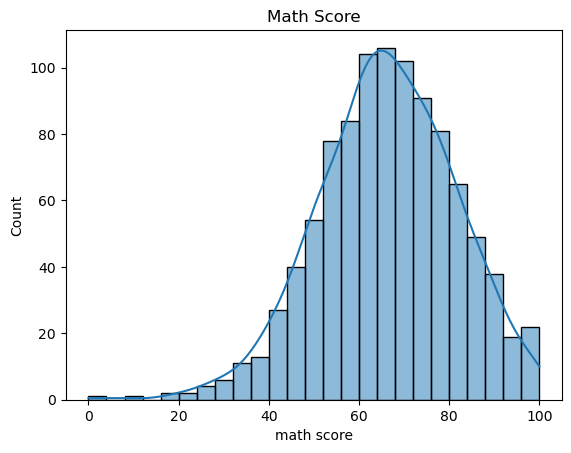

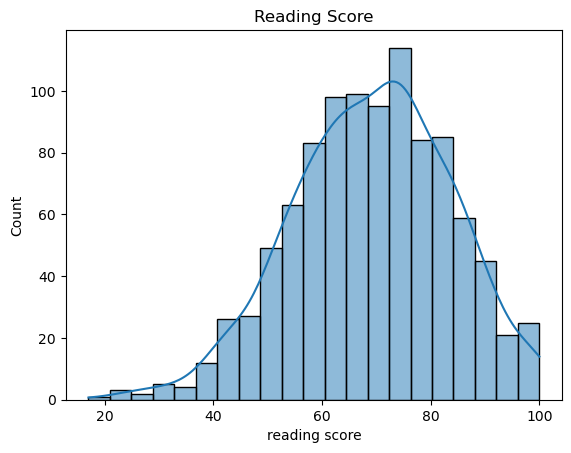

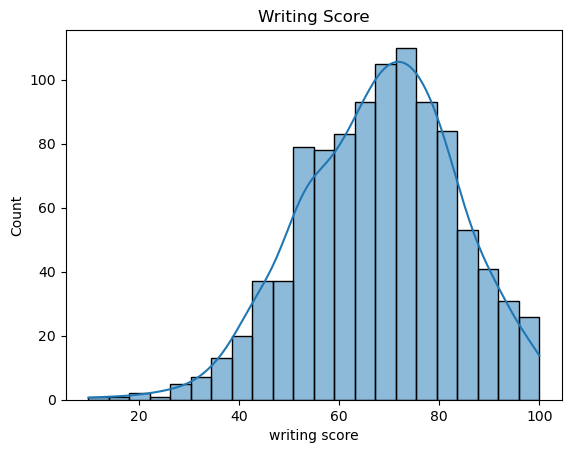

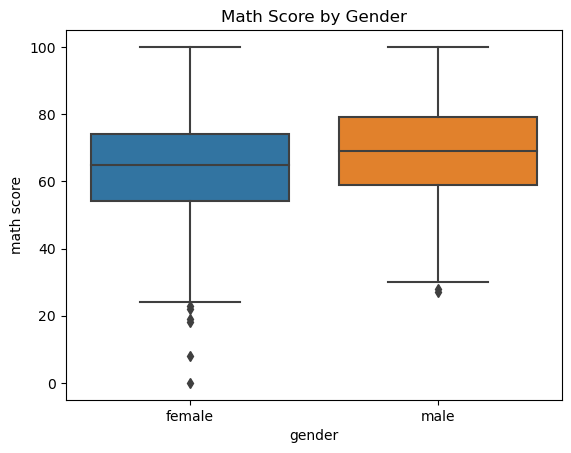

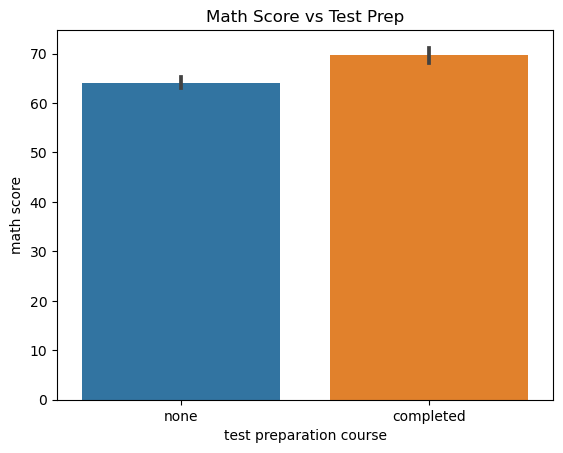

In [50]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Math Score Distribution
sns.histplot(data['math score'], kde=True)
plt.title("Math Score")
plt.show()

# Reading Score Distribution
sns.histplot(data['reading score'],kde=True)
plt.title("Reading Score")
plt.show()

# Writing Score Distribution
sns.histplot(data['writing score'], kde=True)
plt.title("Writing Score")
plt.show()

# Gender-wise Math Scores
sns.boxplot(x='gender', y='math score', data=data)
plt.title("Math Score by Gender")
plt.show()

# Test Prep vs Math Score
sns.barplot(x='test preparation course', y='math score', data=data)
plt.title("Math Score vs Test Prep")
plt.show()


# 3. Predict whether a student will pass or fail based on scores and other features.


In [67]:
# Calculate average without using underscores
data['average'] = (data['math score'] + data['reading score'] + data['writing score']) / 3

# Label Pass/Fail
data['result'] = data['average'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

# Display as proper table
table = data[['math score', 'reading score', 'writing score', 'average', 'result']]
display(table)  # use this in Jupyter/Colab


,math score,reading score,writing score,average,result
0,72,72,74,72.666667,Pass
1,69,90,88,82.333333,Pass
2,90,95,93,92.666667,Pass
3,47,57,44,49.333333,Pass
4,76,78,75,76.333333,Pass
...,...,...,...,...,...
995,88,99,95,94.000000,Pass
996,62,55,55,57.333333,Pass
997,59,71,65,65.000000,Pass
998,68,78,77,74.333333,Pass


In [68]:
print(table.to_string(index=False))

 math score  reading score  writing score    average result
         72             72             74  72.666667   Pass
         69             90             88  82.333333   Pass
         90             95             93  92.666667   Pass
         47             57             44  49.333333   Pass
         76             78             75  76.333333   Pass
         71             83             78  77.333333   Pass
         88             95             92  91.666667   Pass
         40             43             39  40.666667   Pass
         64             64             67  65.000000   Pass
         38             60             50  49.333333   Pass
         58             54             52  54.666667   Pass
         40             52             43  45.000000   Pass
         65             81             73  73.000000   Pass
         78             72             70  73.333333   Pass
         50             53             58  53.666667   Pass
         69             75             7

# 4. Use Logistic Regression or Random Forest for classification.




In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create target column
data['average'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
data['result'] = data['average'].apply(lambda x: 1 if x >= 40 else 0)

# Encode and split
df = pd.get_dummies(data, drop_first=True)
X = df.drop('result', axis=1)
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


# 5. Evaluate the model using accuracy, confusion matrix, F1-score.


In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [87]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [88]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[  5   0]
 [  0 195]]


In [89]:
# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 1.0


# 6. Add comments/markdown to explain the steps.


In [ ]:
# Importing necessary libraries
